# DEEPESH ADWANI   

# IMPLEMENTING RECURRENT NEURAL NETWORKS FOR TIME SERIES FORECASTING AND STOCK MARK PREDICTION

In [1]:
from keras.layers import Dense,Flatten,SimpleRNN,Dropout
from keras.models import Sequential
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('GOOG.csv')
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [3]:
def generate_time_series(sample_size, n_steps):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #wave1+
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #wave2+
 series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5) #noise
 return series[..., np.newaxis].astype(np.float32)

In [4]:
seqdata = generate_time_series(10000,51)

In [5]:
seqdata[0][50]

array([0.04151234], dtype=float32)

In [6]:
seqdata.shape

(10000, 51, 1)

In [7]:
X = seqdata

In [8]:
X = X[:,:-1]

In [9]:
y = X[:,-1,:]

In [10]:
y

array([[ 0.09913396],
       [-0.30665436],
       [ 0.5123295 ],
       ...,
       [-0.4075108 ],
       [ 0.27888572],
       [ 0.27434108]], dtype=float32)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [12]:
num_samples = 10000
time_steps = 51

In [13]:
model_fc = Sequential([
    Dense(128, activation='relu',input_shape=(50,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model_fc.compile(optimizer='adam', loss='mean_squared_error')
history = model_fc.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0018
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 9.5207e-04 - val_loss: 9.1496e-04
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 6.7304e-04 - val_loss: 6.6719e-04
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 5.4746e-04 - val_loss: 6.3932e-04
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 4.5008e-04 - val_loss: 4.7752e-04
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 3.6787e-04 - val_loss: 3.8240e-04
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 3.1095e-04 - val_loss: 4.7453e-04
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 3.0529e-04 - val_loss: 4.0103e-04
Epoch 10/50
219/219 [=======================

In [14]:
pred = model_fc.predict(X_test)

31/31 [==============================] - 0s 2ms/step


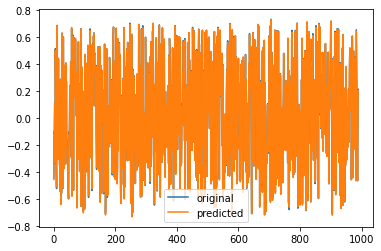

In [15]:
plt.plot(y_test,label='original')
plt.plot(pred,label='predicted')
plt.legend()
plt.show()

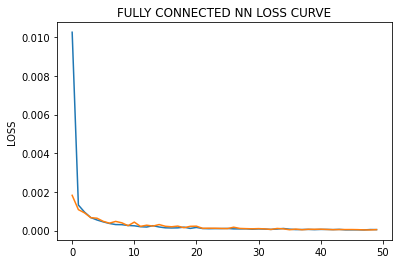

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss,label='LOSS')
plt.ylabel("LOSS")
plt.title("FULLY CONNECTED NN LOSS CURVE")
plt.plot(val_loss,label='VALIDATION LOSS')
plt.show()

In [17]:
X_train.shape
s = X_train.shape
s

(7000, 50, 1)

In [18]:
#Simple RNN with one layer (output layer)
model_rnn_one = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(50,1)),
    Dense(1)
])
model_rnn_one.compile(optimizer='adam', loss='mean_squared_error')
history1 = model_rnn_one.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 3s 10ms/step - loss: 0.0116 - val_loss: 4.1227e-04
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 2.1979e-04 - val_loss: 1.1082e-04
Epoch 3/50
219/219 [==============================] - 2s 9ms/step - loss: 7.3398e-05 - val_loss: 3.9071e-05
Epoch 4/50
219/219 [==============================] - 2s 9ms/step - loss: 3.0625e-05 - val_loss: 2.0564e-05
Epoch 5/50
219/219 [==============================] - 2s 9ms/step - loss: 1.8480e-05 - val_loss: 1.4727e-05
Epoch 6/50
219/219 [==============================] - 2s 9ms/step - loss: 1.4338e-05 - val_loss: 1.6947e-05
Epoch 7/50
219/219 [==============================] - 2s 9ms/step - loss: 1.2316e-05 - val_loss: 9.8334e-06
Epoch 8/50
219/219 [==============================] - 2s 9ms/step - loss: 1.0744e-05 - val_loss: 8.4383e-06
Epoch 9/50
219/219 [==============================] - 2s 9ms/step - loss: 9.3307e-06 - val_loss: 9.5088e-06
Epoch 10/50
219/219 [==========

31/31 [==============================] - 0s 4ms/step


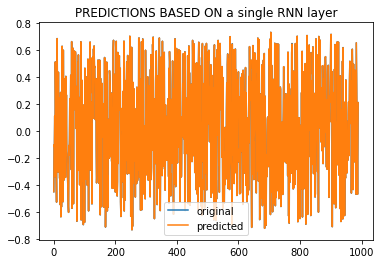

In [19]:
pred1 = model_rnn_one.predict(X_test)
plt.plot(y_test,label='original')
plt.plot(pred1,label='predicted')
plt.legend()
plt.title("PREDICTIONS BASED ON a single RNN layer")
plt.show()

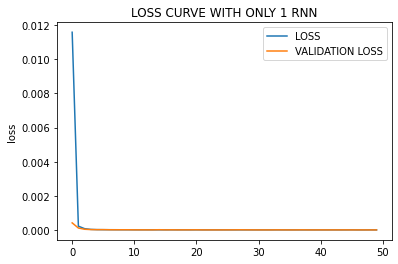

In [20]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss,label="LOSS")
plt.ylabel("loss")
plt.plot(val_loss,label="VALIDATION LOSS")
plt.legend()
plt.title("LOSS CURVE WITH ONLY 1 RNN")
plt.show()

In [21]:
model_rnn_hidden = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(50, 1)),
    SimpleRNN(32, activation='relu'),
    Dense(1)
])

In [22]:
model_rnn_hidden.compile(optimizer='adam', loss='mean_squared_error')
history2 = model_rnn_hidden.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 6s 20ms/step - loss: 0.0047 - val_loss: 1.2748e-04
Epoch 2/50
219/219 [==============================] - 4s 18ms/step - loss: 7.0269e-05 - val_loss: 5.0325e-05
Epoch 3/50
219/219 [==============================] - 4s 19ms/step - loss: 4.6069e-05 - val_loss: 3.0397e-05
Epoch 4/50
219/219 [==============================] - 4s 19ms/step - loss: 3.0379e-05 - val_loss: 2.4683e-05
Epoch 5/50
219/219 [==============================] - 4s 19ms/step - loss: 3.1186e-05 - val_loss: 2.3875e-05
Epoch 6/50
219/219 [==============================] - 5s 21ms/step - loss: 1.9600e-05 - val_loss: 1.7033e-05
Epoch 7/50
219/219 [==============================] - 4s 20ms/step - loss: 1.9186e-05 - val_loss: 1.3482e-05
Epoch 8/50
219/219 [==============================] - 4s 20ms/step - loss: 1.7489e-05 - val_loss: 1.3030e-05
Epoch 9/50
219/219 [==============================] - 4s 18ms/step - loss: 1.6266e-05 - val_loss: 1.3244e-05
Epoch 10/50
219/219 [==

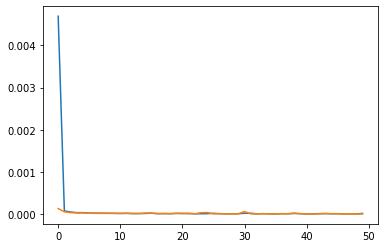

In [23]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.show()

In [24]:
con1 = data.date>"2020-01-01 00:00:00+00:00"
con2 = data.date<"2021-12-31 00:00:00+00:00"
yeardata = data[con1 & con2]

In [25]:
yeardata

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
894,GOOG,2020-01-02 00:00:00+00:00,1367.37,1368.140,1341.5500,1341.55,1406731,1367.37,1368.140,1341.5500,1341.55,1406731,0.0,1.0
895,GOOG,2020-01-03 00:00:00+00:00,1360.66,1372.500,1345.5400,1347.86,1187006,1360.66,1372.500,1345.5400,1347.86,1187006,0.0,1.0
896,GOOG,2020-01-06 00:00:00+00:00,1394.21,1396.500,1350.0000,1350.00,1733149,1394.21,1396.500,1350.0000,1350.00,1733149,0.0,1.0
897,GOOG,2020-01-07 00:00:00+00:00,1393.34,1402.990,1390.3800,1397.94,1511693,1393.34,1402.990,1390.3800,1397.94,1511693,0.0,1.0
898,GOOG,2020-01-08 00:00:00+00:00,1404.32,1411.580,1390.8400,1392.08,1529177,1404.32,1411.580,1390.8400,1392.08,1529177,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [26]:
googmodel = Sequential([
    SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(30,1)),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

In [27]:
window_size = 30
X = []  # Input sequences
y = []  # Output labels

for i in range(len(yeardata) - window_size):
    X.append(data['close'][con1 & con2].values[i:i+window_size])
    y.append(data['close'][con1 & con2].values[i+window_size])
    
X = np.array(X)
y = np.array(y)

print("Input sequences shape:", X.shape)
print("Output labels shape:", y.shape)

Input sequences shape: (334, 30)
Output labels shape: (334,)


In [28]:
scaler = StandardScaler()

In [29]:
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [31]:
# Compile the model
googmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ghistory = googmodel.fit(X_train,y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
8/8 [==============================] - 4s 102ms/step - loss: 0.7377 - val_loss: 0.3771
Epoch 2/50
8/8 [==============================] - 0s 39ms/step - loss: 0.4306 - val_loss: 0.0523
Epoch 3/50
8/8 [==============================] - 0s 35ms/step - loss: 0.2049 - val_loss: 0.1278
Epoch 4/50
8/8 [==============================] - 0s 35ms/step - loss: 0.1494 - val_loss: 0.1058
Epoch 5/50
8/8 [==============================] - 0s 34ms/step - loss: 0.1191 - val_loss: 0.0601
Epoch 6/50
8/8 [==============================] - 0s 33ms/step - loss: 0.1066 - val_loss: 0.0440
Epoch 7/50
8/8 [==============================] - 0s 36ms/step - loss: 0.1250 - val_loss: 0.1036
Epoch 8/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0954 - val_loss: 0.0577
Epoch 9/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0786 - val_loss: 0.0944
Epoch 10/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0789 - val_loss: 0.0647
Epoch 11/50
8/8 [===========

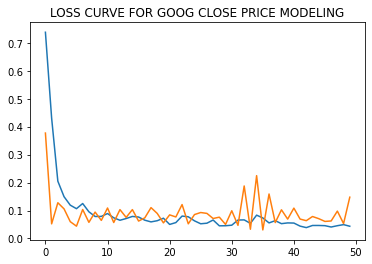

In [32]:
loss = ghistory.history['loss']
val_loss = ghistory.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title("LOSS CURVE FOR GOOG CLOSE PRICE MODELING")
plt.show()

2/2 [==============================] - 0s 21ms/step


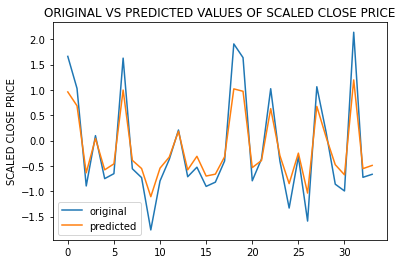

In [33]:
pred = googmodel.predict(X_test)
plt.plot(y_test,label="original")
plt.plot(pred,label="predicted")
plt.legend()
plt.title("ORIGINAL VS PREDICTED VALUES OF SCALED CLOSE PRICE")
plt.ylabel("SCALED CLOSE PRICE")
plt.show()

In [34]:
mean_squared_error(y_test,pred)

0.15297103505450832

In [35]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test,pred)

31.634225397624956

In [48]:
#based on the experiments on the number of epochs 50 turned out to be the most optimum number of epochs for learning as the loss curve also decreases as the need there has been a little bit of overfitting but thats accounted for the training data